# 1- Analyse des liaison entre deux variables quantitatives

# Analyse graphique

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd

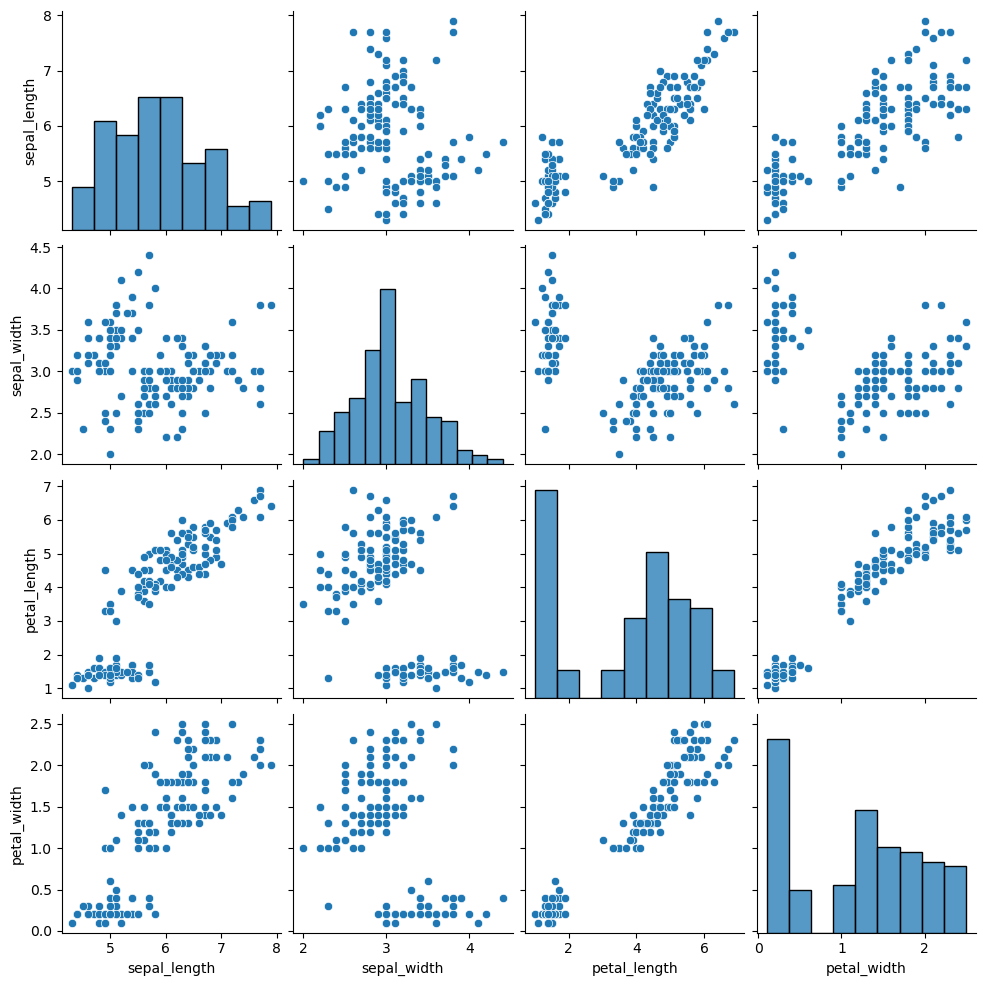

In [4]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, kind = "scatter")



## Test de corrélation de Pearson

### Hypothèses :
- H0(hypothèse nulle) : Il n'y a pas de corrélation **linéaire** entre les deux variables.
- H1(hypothèse alternative) : Il y a une corrélation **linéaire** entre les deux variables.

### Conditions d'utilisation :
- Les deux variables sont quantitatives et mesurées sur une échelle continue.
- La relation entre les deux variables est linéaire
- Les deux variables suivent une **distribution normale**.


### Interprétation :
Le coefficient de corrélation de pearson varie entre -1 et 1. 

- Si le coefficient est proche de 1 par exemple (0.6), il y a une corrélation positive entre les variables.
- Si le coefficient est proche de -1 (par exemple -0.6), il y a une corrélation négative entre les variables.
- Si le coefficient est proche de 0, il n'y a pas de corrélation linéaire entre les variables.


Vous pouvez aussi regarder la pvaleur du test:

- Si p < 0.05, on rejette H0 et on conclut qu'il y a une corrélation significative entre les deux variables.
- Si p >= 0.05, on ne peut pas rejeter H0 et on conclut qu'il n'y a pas suffisamment de preuves pour dire qu'il y a une corrélation significative entre les deux variables.



In [6]:
# Analyse de la normalite grace au test de shapiro

from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau

In [7]:
# Analyse de la normalite grace au test de shapiro

from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau

# Variables quantitatives d'interet

var_1 = 'sepal_length'
var_2 = 'petal_lenght'

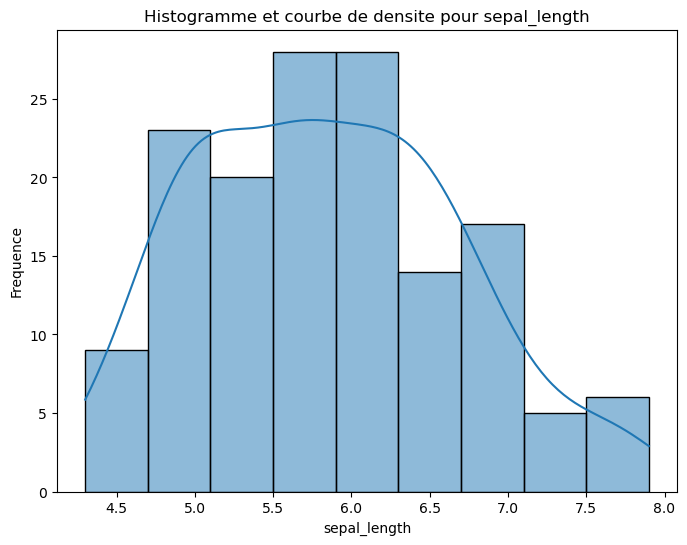

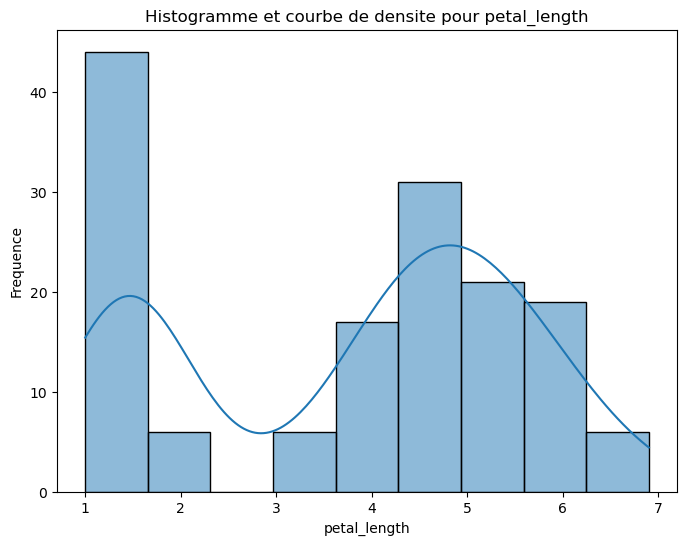

In [10]:
# Analyse de la normalite grace au test de shapiro

from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau

# Variables quantitatives d'interet

var_1 = 'sepal_length'
var_2 = 'petal_length'

# Analyse graphique de la normalite des deux variables

for var in [var_1, var_2]:
    plt.figure(figsize = (8, 6))
    sns.histplot(iris[var], kde = True)
    plt.xlabel(var)
    plt.ylabel('Frequence')
    plt.title(f"Histogramme et courbe de densite pour {var}")
    plt.show()

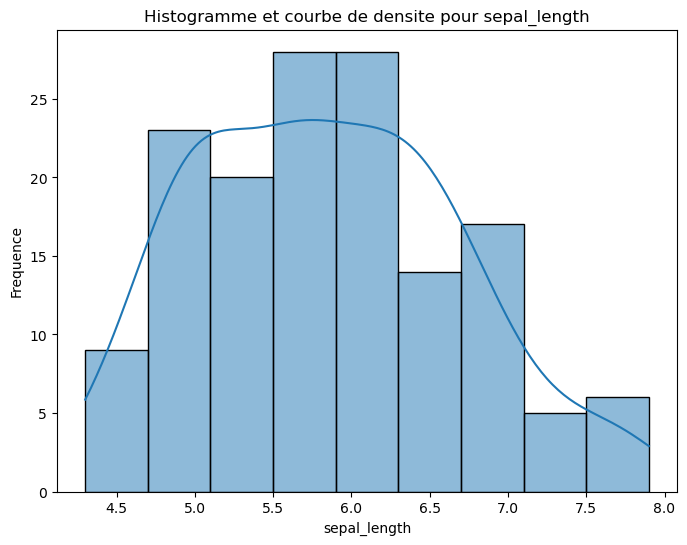

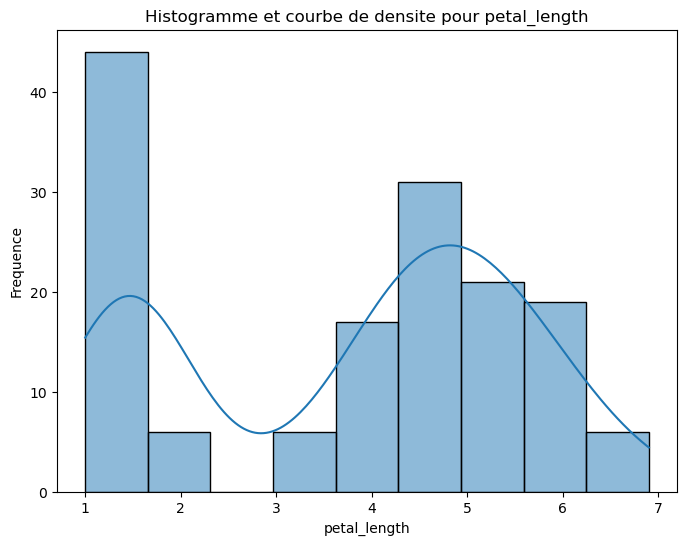

P-valeur de la normalite (Shapiro-Wilk) pour sepal_length 0.01018026564270258
P-valeur de la normalite (Shapiro-Wilk) pour petal_length 7.412652158755861e-10


In [11]:
# Analyse de la normalite grace au test de shapiro

from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau

# Variables quantitatives d'interet

var_1 = 'sepal_length'
var_2 = 'petal_length'

# Analyse graphique de la normalite des deux variables

for var in [var_1, var_2]:
    plt.figure(figsize = (8, 6))
    sns.histplot(iris[var], kde = True)
    plt.xlabel(var)
    plt.ylabel('Frequence')
    plt.title(f"Histogramme et courbe de densite pour {var}")
    plt.show()
    
# Verifions la normalite a l'aide du test de shapiro-wilk

for var in [var_1, var_2]:
    _, p_value = shapiro(iris[var])
    print(f"P-valeur de la normalite (Shapiro-Wilk) pour {var}", p_value)

In [12]:
# Calculons les coefficients de correlation de Spearman, Pearson et Kendall

pearsonr(iris[var_1], iris[var_2])

PearsonRResult(statistic=0.8717537758865831, pvalue=1.0386674194498099e-47)

## Corrélation de Spearman

### Hypothèses :
- H0 : Il n'y a pas de corrélation **monotone** entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

### Conditions d'utilisation :
- Les deux variables sont quantitatives ou **ordinales**.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).



### Interprétation :
Le coefficient de corrélation de Spearman varie entre -1 et 1. 

- Si le coefficient est proche de 1 par exemple (0.6), il y a une corrélation positive entre les variables.
- Si le coefficient est proche de -1 (par exemple -0.6), il y a une corrélation négative entre les variables.
- Si le coefficient est proche de 0, il n'y a pas de  **corrélation monotone (linéaire ou non linéaire)** entre les variables.


Vous pouvez aussi regarder la pvaleur du test:

- Si p < 0.05, on rejette H0 et on conclut qu'il y a une corrélation monotone significative entre les deux variables.
- Si p >= 0.05, on ne peut pas rejeter H0 et on conclut qu'il n'y a pas suffisamment de preuves pour dire qu'il y a une corrélation monotone significative entre les deux variables.

In [13]:
# Correlation de Spearman

spearmanr(iris[var_1], iris[var_2])

SignificanceResult(statistic=0.881898126434986, pvalue=3.4430872780470036e-50)

## Test de corrélation de Kendall

### Hypothèses :
- H0 : Il n'y a pas de **corrélation monotone** entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

### Conditions d'utilisation :
- Les deux variables sont quantitatives ou ordinales.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).


### Interprétation :

Le coefficient de corrélation de Kendall varie entre -1 et 1. 
- Si le coefficient est proche de 1 (un seuil à 70%) , il y a une corrélation positive entre les variables.
- Si le coefficient est proche de -1, il y a une corrélation négative entre les variables.
- Si le coefficient est proche de 0, il n'y a pas de corrélation monotone entre les variables



- Si p < 0.05, on rejette H0 et on conclut qu'il y a une corrélation monotone significative entre les deux variables.
- Si p >= 0.05, on ne peut pas rejeter H0 et on conclut qu'il n'y a pas suffisamment de preuves pour dire qu'il y a une corrélation monotone significative entre les deux variables.


In [15]:
# Calcul de la correlation de kendall

kendalltau(iris[var_1], iris[var_2])

SignificanceResult(statistic=0.7185159275387326, pvalue=1.1691259442824266e-36)

# 2- Analyse de la liaion entre deux variables qualitatives

Dans cette partie, nous allons explorer différents tests **d'association** pour étudier la relation entre deux variables qualitatives. Nous utiliserons les tests du chi-carré (chi2) et de Cramér-V. Nous utiliserons le jeu de données "Titanic" populaire pour démontrer l'application de ces tests en Python.


In [16]:
# Analyse graphique entre sex et class de titanic

titanic = sns.load_dataset("titanic")

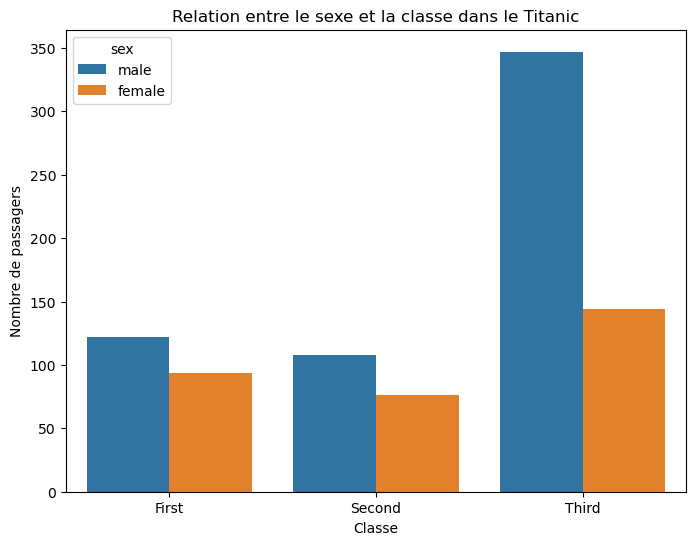

In [17]:
# Analyse graphique entre sex et class de titanic

titanic = sns.load_dataset("titanic")

# Creons un graphique de la relation entre 'sex' et 'class' dans Titanic

plt.figure(figsize = (8, 6))
sns.countplot(data = titanic, x = 'class', hue = 'sex')
plt.xlabel("Classe")
plt.ylabel("Nombre de passagers")
plt.title("Relation entre le sexe et la classe dans le Titanic")
plt.show()


## 1. Test du chi-carré (chi2)

### Hypothèses
- H0 (hypothèse nulle): Il n'y a pas d'association entre les deux variables qualitatives.
- H1 (hypothèse alternative): Il y a une association entre les deux variables qualitatives.

### Conditions d'utilisation
- Les deux variables sont qualitatives (catégoriques).
- Les effectifs attendus sont supérieurs à 5 pour chaque croissement de variable

### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut qu'il y a une association entre les deux variables qualitatives.



In [18]:
# Calculons le chi deux sur la base Titanic

from scipy.stats import chi2_contingency

In [19]:
# Calculons le chi deux sur la base Titanic

from scipy.stats import chi2_contingency

# Creons un tableau de contingence

contingency_table = pd.crosstab(titanic['sex'], titanic['class'])
contingency_table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


In [20]:
# Effectuons le test du chi-carre

chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

In [21]:
# Effectuons le test du chi-carre

chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# Affichons les resultats

print("Statistique du chi-carre :", chi2_stat)
print("P-valeur :", p_value)
print("Degres de liberte :", dof)
print("Frequences attendues :\n", expected_freq)

Statistique du chi-carre : 16.971499095517114
P-valeur : 0.00020638864348233114
Degres de liberte : 2
Frequences attendues :
 [[ 76.12121212  64.84399551 173.03479237]
 [139.87878788 119.15600449 317.96520763]]



## 2. Coefficient de Cramér-V

Le coefficient de Cramér-V mesure la force de l'association entre deux variables qualitatives. Il varie entre 0 (pas d'association) et 1 (association parfaite).

### Conditions d'utilisation
- Les deux variables sont qualitatives (catégoriques).
- Le test du chi-carré a déjà été effectué et a montré une association significative entre les deux variables.

### Interprétation
Plus la valeur de **Cramér-V est proche de 1 (supérieur à 0.60)**, plus l'association entre les deux variables est forte.

In [22]:
# Calculons le coefficient de Cramer-V

n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramer_v = np.sqrt(chi2_stat / (n * min_dim))

In [23]:
# Calculons le coefficient de Cramer-V

n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramer_v = np.sqrt(chi2_stat / (n * min_dim))

# Affichons le coefficient de Cramer-V

print("Coefficient de Cramer-V :", cramer_v)

Coefficient de Cramer-V : 0.1380133986221395


## Coefficient T de Tschuprow

Le coefficient T de Tschuprow est une mesure de liaison entre deux variables qualitatives. Il est basé sur le chi-carré (χ²) et prend en compte la taille de l'échantillon et le nombre de catégories dans chaque variable.

### Hypothèses
- H0 (hypothèse nulle): Il n'y a pas de relation entre les deux variables qualitatives.
- H1 (hypothèse alternative): Il y a une relation entre les deux variables qualitatives.

### Conditions d'utilisation
- Les variables sont qualitatives.
- Les observations sont indépendantes.
- Les effectifs des cellules du tableau de contingence sont suffisants (généralement, chaque cellule doit avoir un effectif d'au moins 5).

### Interprétation
Le coefficient T de Tschuprow varie entre 0 et 1. Une valeur proche de 0 indique une faible liaison entre les deux variables, tandis qu'une valeur proche de 1 indique une liaison forte. La force de la liaison dépend du contexte et de la discipline, mais en général, une valeur supérieure à 0,3 est considérée comme une liaison modérée et une valeur **supérieure à 0,5 est considérée comme une liaison forte**.

In [24]:
# Calculons le coefficient T de Tschuprow

n = titanic.shape[0]
min_dim = min(contingency_table.shape) - 1

In [25]:
# Calculons le coefficient T de Tschuprow

n = titanic.shape[0]
min_dim = min(contingency_table.shape) - 1

# Effectuons le test du chi-carre

chi2, p_value, _, _ = st.chi2_contingency(contingency_table)
tschuprow_t = np.sqrt(chi2 / (n * min_dim))

print("Coefficient T de Tschuprow :", tschuprow_t)
print("P-valeur :", p_value)

Coefficient T de Tschuprow : 0.1380133986221395
P-valeur : 0.00020638864348233114


# 3- Analyse de la liaison entre une variable qualitative et une variable quantitative

Dans cette, nous allons explorer différents tests pour étudier la liaison entre une variable qualitative et une variable quantitative. Nous utiliserons les tests de Student (t-test), ANOVA, Mann-Whitney, Kruskal-Walli. Nous utiliserons le jeu de données "Iris" populaire pour démontrer l'application de ces tests en Python.

# Analyse graphique

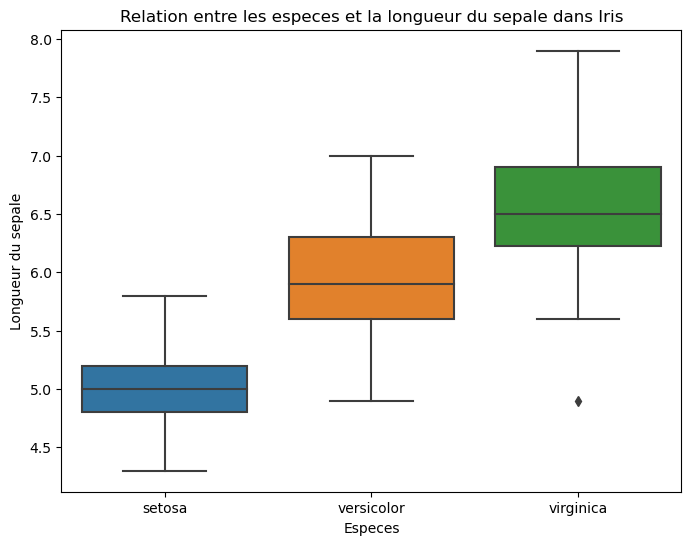

In [26]:
# Creons un boxplot de la relation entre 'species' et 'sepal_length' dans iris

plt.figure(figsize = (8, 6))
sns.boxplot(data = iris, x = 'species', y = 'sepal_length')
plt.xlabel("Especes")
plt.ylabel("Longueur du sepale")
plt.title("Relation entre les especes et la longueur du sepale dans Iris")
plt.show()



##  Test de Student (t-test)

### Hypothèses
- H0 (hypothèse nulle): Les **moyennes** des deux groupes sont égales.
- H1 (hypothèse alternative): Les moyennes des deux groupes sont différentes.

### Conditions d'utilisation
- La variable quantitative est **normalement** distribuée dans chaque groupe.
- **Les variances des deux groupes sont égales**.
- Les observations sont indépendantes.

### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut que les moyennes des deux groupes sont significativement différentes.



In [28]:
from scipy.stats import ttest_ind, f_oneway, mannwhitneyu, kruskal, wilcoxon

# Chargeons le jeu de donnees iris

iris = sns.load_dataset("iris")

In [30]:
# Verifions la normalite 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_ind, f_oneway, mannwhitneyu, kruskal

In [31]:
# Verifions la normalite 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_ind, f_oneway, mannwhitneyu, kruskal

# Chargeons le jeu de donnees Iris

iris = sns.load_dataset("iris")

In [32]:
# Verifions la normalite 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_ind, f_oneway, mannwhitneyu, kruskal

# Chargeons le jeu de donnees Iris

iris = sns.load_dataset("iris")

# Separons les donnees en groupes en fonction de l'espece

setosa = iris[iris['species'] == 'setosa']['sepal_length']
virginica = iris[iris['species'] == 'virginica']['sepal_length']
versicolor = iris[iris['species'] == 'versicolor']['sepal_length']

In [33]:
# Verifions la normalite 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_ind, f_oneway, mannwhitneyu, kruskal

# Chargeons le jeu de donnees Iris

iris = sns.load_dataset("iris")

# Separons les donnees en groupes en fonction de l'espece

setosa = iris[iris['species'] == 'setosa']['sepal_length']
virginica = iris[iris['species'] == 'virginica']['sepal_length']
versicolor = iris[iris['species'] == 'versicolor']['sepal_length']

# Verifions la normalite a l'aide du test de Shapiro-Milk

_, setosa_p_value = shapiro(setosa)
_, virginica_p_value = shapiro(virginica)
_, versicolor_p_value = shapiro(versicolor)

print("P-valeur de la normalite (Shapiro_Wilk) - Setosa", setosa_p_value)
print("P-valeur de la normalite (Shapiro-Wilk) - Virginica", virginica_p_value)
print("P-valeur de la normalite (Shapiro-Wilk) - Veriscolor", versicolor_p_value)

P-valeur de la normalite (Shapiro_Wilk) - Setosa 0.4595010578632355
P-valeur de la normalite (Shapiro-Wilk) - Virginica 0.25831347703933716
P-valeur de la normalite (Shapiro-Wilk) - Veriscolor 0.4647378921508789


P-valeur de la normalite (Shapiro_Wilk) - Setosa 0.4595010578632355
P-valeur de la normalite (Shapiro-Wilk) - Virginica 0.25831347703933716
P-valeur de la normalite (Shapiro-Wilk) - Veriscolor 0.4647378921508789


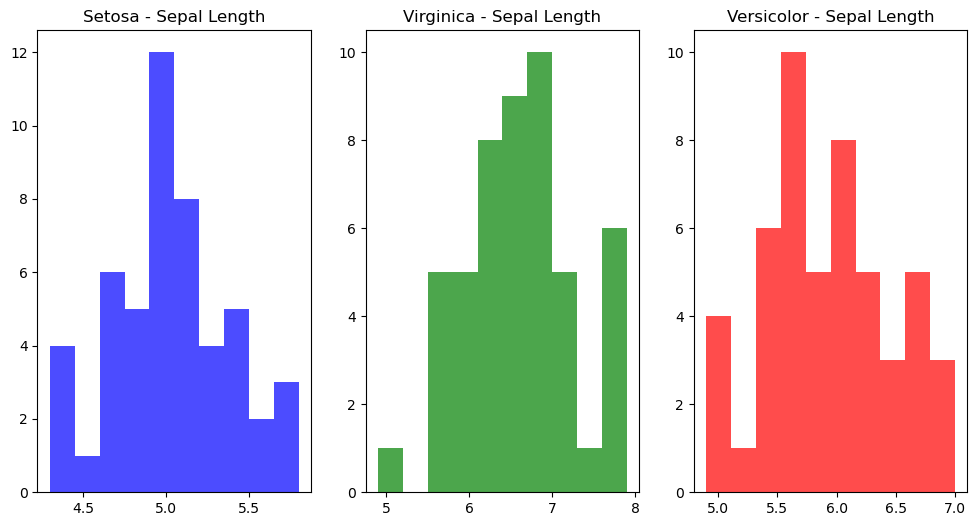

In [34]:
# Verifions la normalite 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_ind, f_oneway, mannwhitneyu, kruskal

# Chargeons le jeu de donnees Iris

iris = sns.load_dataset("iris")

# Separons les donnees en groupes en fonction de l'espece

setosa = iris[iris['species'] == 'setosa']['sepal_length']
virginica = iris[iris['species'] == 'virginica']['sepal_length']
versicolor = iris[iris['species'] == 'versicolor']['sepal_length']

# Verifions la normalite a l'aide du test de Shapiro-Milk

_, setosa_p_value = shapiro(setosa)
_, virginica_p_value = shapiro(virginica)
_, versicolor_p_value = shapiro(versicolor)

print("P-valeur de la normalite (Shapiro_Wilk) - Setosa", setosa_p_value)
print("P-valeur de la normalite (Shapiro-Wilk) - Virginica", virginica_p_value)
print("P-valeur de la normalite (Shapiro-Wilk) - Veriscolor", versicolor_p_value)

# Histogrammes pour verifier visuellement la normalite

plt.figure(figsize = (12, 6))
plt.subplot(131)
plt.hist(setosa, bins = 10, color = 'blue', alpha = 0.7)
plt.title("Setosa - Sepal Length")
plt.subplot(132)
plt.hist(virginica, bins = 10, color = 'green', alpha = 0.7)
plt.title("Virginica - Sepal Length")
plt.subplot(133)
plt.hist(versicolor, bins = 10, color = 'red', alpha = 0.7)
plt.title("Versicolor - Sepal Length")
plt.show()

P-valeur de la normalite (Shapiro_Wilk) - Setosa 0.4595010578632355
P-valeur de la normalite (Shapiro-Wilk) - Virginica 0.25831347703933716
P-valeur de la normalite (Shapiro-Wilk) - Veriscolor 0.4647378921508789


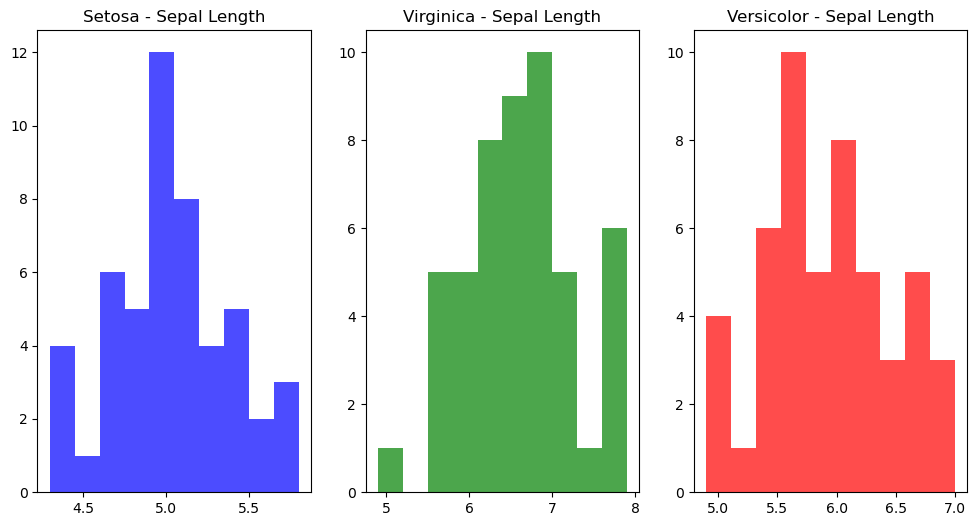

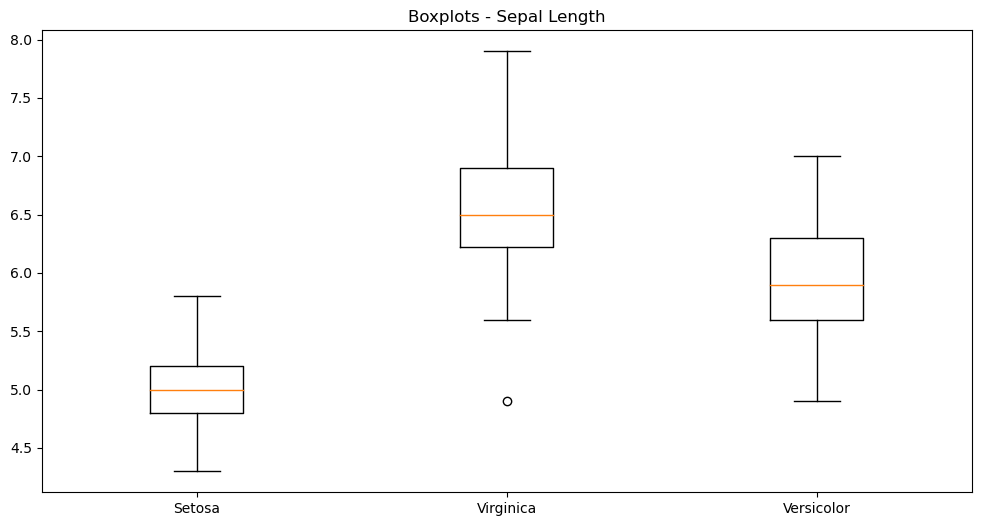

In [35]:
# Verifions la normalite 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_ind, f_oneway, mannwhitneyu, kruskal

# Chargeons le jeu de donnees Iris

iris = sns.load_dataset("iris")

# Separons les donnees en groupes en fonction de l'espece

setosa = iris[iris['species'] == 'setosa']['sepal_length']
virginica = iris[iris['species'] == 'virginica']['sepal_length']
versicolor = iris[iris['species'] == 'versicolor']['sepal_length']

# Verifions la normalite a l'aide du test de Shapiro-Milk

_, setosa_p_value = shapiro(setosa)
_, virginica_p_value = shapiro(virginica)
_, versicolor_p_value = shapiro(versicolor)

print("P-valeur de la normalite (Shapiro_Wilk) - Setosa", setosa_p_value)
print("P-valeur de la normalite (Shapiro-Wilk) - Virginica", virginica_p_value)
print("P-valeur de la normalite (Shapiro-Wilk) - Veriscolor", versicolor_p_value)

# Histogrammes pour verifier visuellement la normalite

plt.figure(figsize = (12, 6))
plt.subplot(131)
plt.hist(setosa, bins = 10, color = 'blue', alpha = 0.7)
plt.title("Setosa - Sepal Length")
plt.subplot(132)
plt.hist(virginica, bins = 10, color = 'green', alpha = 0.7)
plt.title("Virginica - Sepal Length")
plt.subplot(133)
plt.hist(versicolor, bins = 10, color = 'red', alpha = 0.7)
plt.title("Versicolor - Sepal Length")
plt.show()

# Boites a moustaches pour verifier visuellement la normalite

plt.figure(figsize = (12, 6))
plt.boxplot([setosa, virginica, versicolor], labels = ['Setosa', 'Virginica', 'Versicolor'])
plt.title("Boxplots - Sepal Length")
plt.show()

In [36]:
# Test de Student (t-test)

t_stat, t_p_value = ttest_ind(setosa, virginica)
print("Statistique t de Student :", t_stat)
print("P-valeur (t-test) :", t_p_value)

Statistique t de Student : -15.386195820079404
P-valeur (t-test) : 6.892546060674059e-28


##  Test de Mann-Whitney

### Hypothèses
- H0 (hypothèse nulle): Les distributions des deux groupes sont égales.
- H1 (hypothèse alternative): Les distributions des deux groupes sont différentes.

### Conditions d'utilisation
- Les observations sont indépendantes.
- Les données peuvent être ordonnées (au moins ordinale).


In [38]:
# Test de Mann-Whitney

mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(setosa, virginica)
print("Statistique U de Mann-Whitney", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)

Statistique U de Mann-Whitney 38.5
P-valeur (Mann-Whitney) : 6.396699069396538e-17


## ANOVA (Analysis of Variance)

### Hypothèses
- H0 (hypothèse nulle): Les moyennes de tous les groupes sont égales.
- H1 (hypothèse alternative): Au moins une des moyennes des groupes est différente des autres.

### Conditions d'utilisation
- La variable quantitative est normalement distribuée dans chaque groupe.
- Les variances des groupes sont égales.
- Les observations sont indépendantes.

### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut qu'au moins une des moyennes des groupes est significativement différente des autres.


### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut que les distributions des deux groupes sont significativement différentes.



In [39]:
# Anova

anova_stat, anova_p_value = f_oneway(setosa, virginica, versicolor)
print("Statistique de F de l'ANOVA :", anova_stat)
print("P-valeur (ANOVA) :", anova_p_value)

Statistique de F de l'ANOVA : 119.26450218450468
P-valeur (ANOVA) : 1.6696691907693826e-31


### Test de Levene pour l'égalité des variances

Le test de Levene est utilisé pour vérifier **l'hypothèse d'égalité des variances** entre plusieurs groupes. Il est particulièrement utile après l'ANOVA pour vérifier l'hypothèse d'homoscédasticité.

## Hypothèses
- H0 (hypothèse nulle): Les variances des différents groupes sont égales.
- H1 (hypothèse alternative): Au moins une des variances des différents groupes est différente.

## Conditions d'utilisation
- Les échantillons sont indépendants.
- Les observations dans chaque groupe sont indépendantes et identiquement distribuées.

## Interprétation
Si la p-valeur est inférieure à un seuil de signification prédéfini (par exemple, 0,05), on rejette l'hypothèse nulle et on conclut que les variances ne sont pas égales entre les groupes.

In [41]:
from scipy.stats import levene

# Test de levene pour l'egalite des variances

levene_stat, levene_p_value = levene(setosa, virginica, versicolor)
print("Statistique W de Levene :", levene_stat)
print("P-valeur (Levene) :", levene_p_value)

Statistique W de Levene : 6.35272002048269
P-valeur (Levene) : 0.0022585277836218586


### Test de Levene pour l'égalité des variances

Le test de Levene est utilisé pour vérifier **l'hypothèse d'égalité des variances** entre plusieurs groupes. Il est particulièrement utile après l'ANOVA pour vérifier l'hypothèse d'homoscédasticité.

## Hypothèses
- H0 (hypothèse nulle): Les variances des différents groupes sont égales.
- H1 (hypothèse alternative): Au moins une des variances des différents groupes est différente.

## Conditions d'utilisation
- Les échantillons sont indépendants.
- Les observations dans chaque groupe sont indépendantes et identiquement distribuées.

## Interprétation
Si la p-valeur est inférieure à un seuil de signification prédéfini (par exemple, 0,05), on rejette l'hypothèse nulle et on conclut que les variances ne sont pas égales entre les groupes.

In [42]:
# Test de Kruskal_Wallis

kruskal_stat, kruskal_p_value = kruskal(setosa, virginica, versicolor)
print("Statistique H de Kruskal-Wallis :", kruskal_stat)
print("P-valeur (Kruskal-Wallis) :", kruskal_p_value)

Statistique H de Kruskal-Wallis : 96.93743600064833
P-valeur (Kruskal-Wallis) : 8.91873433246198e-22
